# ORIE 4741 Project

Group Members: Lu Cao, Elva Gao, Kinya Wang

Dataset Link:  https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

## Import packages

In [1]:
import numpy as np

# random
import random
from numpy.random import rand, randn

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from patsy import dmatrices

import seaborn as sns

import statistics as stats

## Import data

In [2]:
features = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')
labels = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
submission_format = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Test_Data_Features.csv")
submission_format = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Submission_Format.csv")
features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
features.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [4]:
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
labels.describe()

,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000


# Data cleaning

In [6]:
# from datetime import date

# def d(s):
#   year, month, day = map(int, s.split('-'))
#   return date(year, month, day)

# def days(start, end):
#   return (d(end) - d(start)).days

In [7]:
# convert categorical features (specifically, city name) using one-hot encoding
features = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')
x_df = pd.get_dummies(features['city'])
features.pop('city')
df = pd.concat([x_df, features.reindex(x_df.index)], axis=1)
# convert start date to float
# # from datetime import datetime
# # df['week_start_date']=pd.to_numeric(datetime.strptime(df['week_start_date'], format='%Y-%m-%d'))
# # df['week_start_date']= df['week_start_date']-min(df['week_start_date'])
# # df.head()
# from datetime import date
# min_date = df['week_start_date'].iloc[0]
# df['week_start_date']= df['week_start_date'].apply(lambda x: days( min_date,x))
df.head()

,iq,sj,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


iq                                         0
sj                                         0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_ma

,iq,sj,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.357143,0.642857,2001.031593,26.503434,0.131490,0.127823,0.203130,0.201963,45.702091,298.697750,...,40.125594,82.173009,45.702091,16.744659,4.900618,27.181438,8.095505,32.446497,22.098043,39.362294
std,0.479322,0.479322,5.408314,15.019437,0.137272,0.119478,0.073781,0.083491,43.651356,1.359878,...,43.313117,7.152190,43.651356,1.540958,3.542762,1.281116,2.127521,1.959090,1.570524,47.285701
min,0.000000,0.000000,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.000000,0.000000,1997.000000,13.750000,0.037400,0.048092,0.154057,0.144455,9.785000,297.657857,...,13.200000,77.196429,9.785000,15.554643,2.328571,26.314286,6.528571,31.100000,21.100000,8.850000
50%,0.000000,1.000000,2002.000000,26.500000,0.115550,0.115926,0.195664,0.190121,38.320000,298.640000,...,27.300000,80.287857,38.320000,17.084286,2.857143,27.400000,7.350000,32.800000,22.200000,24.050000
75%,1.000000,1.000000,2005.000000,39.250000,0.231443,0.213429,0.247461,0.246579,70.227500,299.827500,...,52.200000,86.437500,70.227500,17.976071,7.632143,28.130804,9.603571,33.900000,23.300000,53.900000
max,1.000000,1.000000,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


<Figure size 864x576 with 0 Axes>

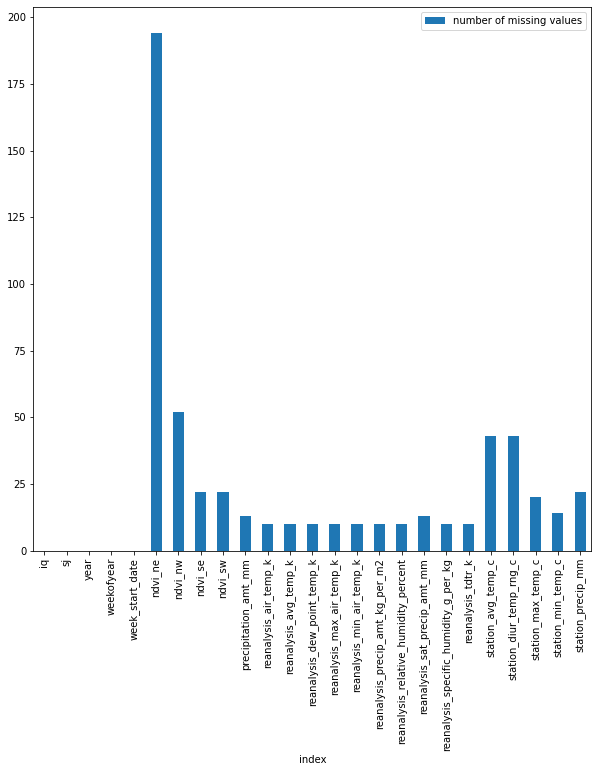

In [8]:
#count number of missing values for each column
print(df.isna().sum())
plt.figure(figsize=(12,8)) 
df.isna().sum().reset_index(name="number of missing values").plot.bar(x='index', y= "number of missing values", rot=90,figsize=(10,10))
#impute missing values based on the avearge of the previous and next values. 
df = df.interpolate()
#drop week_start_date column
df.drop('week_start_date', axis=1, inplace=True)
df.describe()

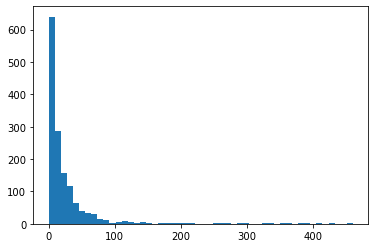

In [9]:
# # of weekly increased cases mostly under 100
plt.hist(labels['total_cases'], bins = 50)
plt.show() 

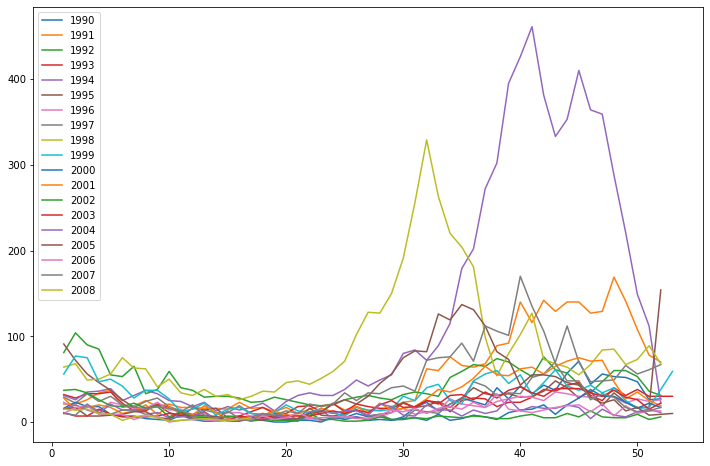

In [10]:
# trend of weeks of year
plt.figure(figsize=(12,8)) 
y_df_sj = labels[labels['city'] == 'sj']
y_df_iq = labels[labels['city'] == 'iq']
week_sj = y_df_sj['year'].unique()
week_iq = y_df_iq['year'].unique()
for week in week_sj:
    temp = y_df_sj[y_df_sj['year'] == week]
    temp = temp.sort_values(by=['weekofyear'])
    plt.plot(temp['weekofyear'], temp['total_cases'], label = week)
plt.legend()

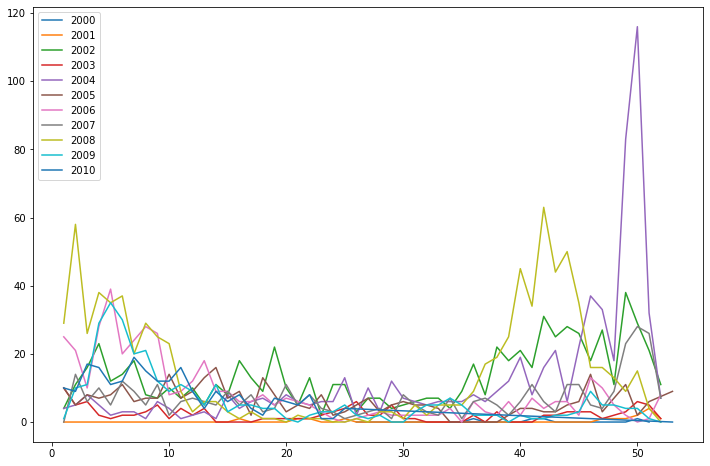

In [11]:
# trend of weeks of year
plt.figure(figsize=(12,8)) 
for week in week_iq:
    temp = y_df_iq[y_df_iq['year'] == week]
    temp = temp.sort_values(by=['weekofyear'])
    plt.plot(temp['weekofyear'], temp['total_cases'], label = week)
plt.legend()

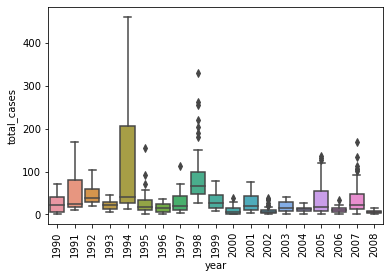

In [12]:
# sj trend over year 
ax = sns.boxplot(data = y_df_sj, x='year',y='total_cases')
for item in ax.get_xticklabels():
    item.set_rotation(90)

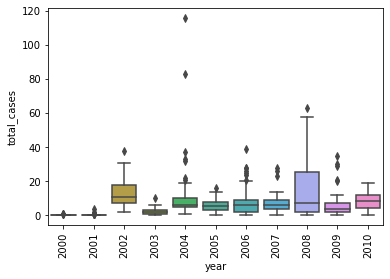

In [13]:
# iq trend over year 
ax = sns.boxplot(data = y_df_iq, x='year',y='total_cases')
for item in ax.get_xticklabels():
    item.set_rotation(90)

<AxesSubplot:>

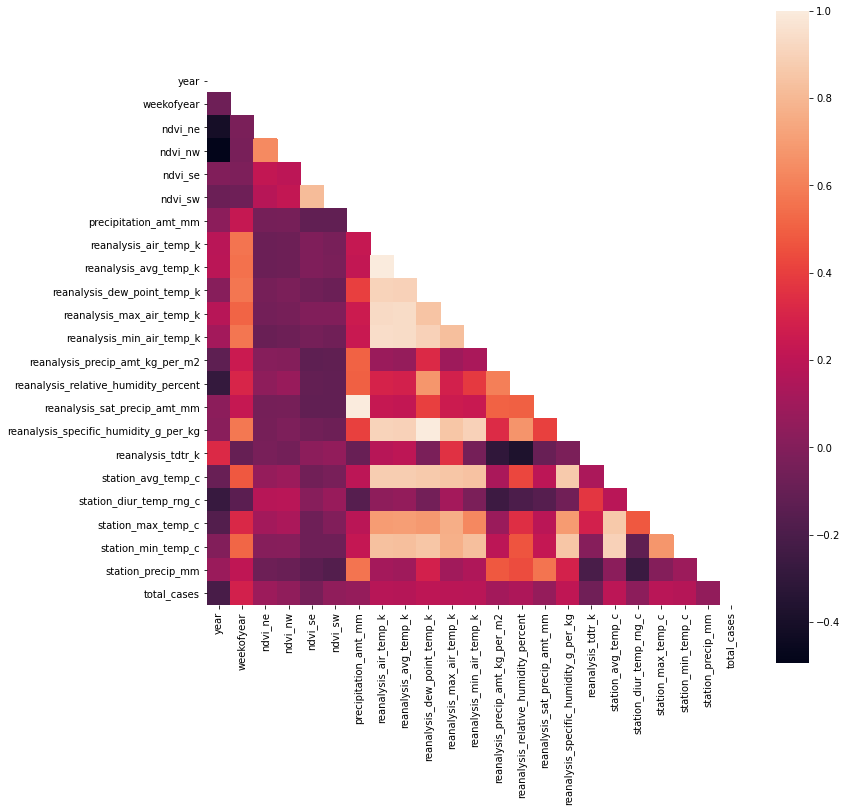

In [28]:
#heatmap of sj
df_sj = df[df['sj'] == 1]
df_sj = df_sj.drop(columns = ['iq', 'sj'])
df_sj = df_sj.merge(y_df_sj, on=['year', 'weekofyear'], how='left').drop(columns = ['city'])
corr_sj = df_sj.corr()
mask = np.triu(np.ones_like(corr_sj))
plt.figure(figsize = (12,12))
sns.heatmap(corr_sj, square=True, mask=mask)

<AxesSubplot:>

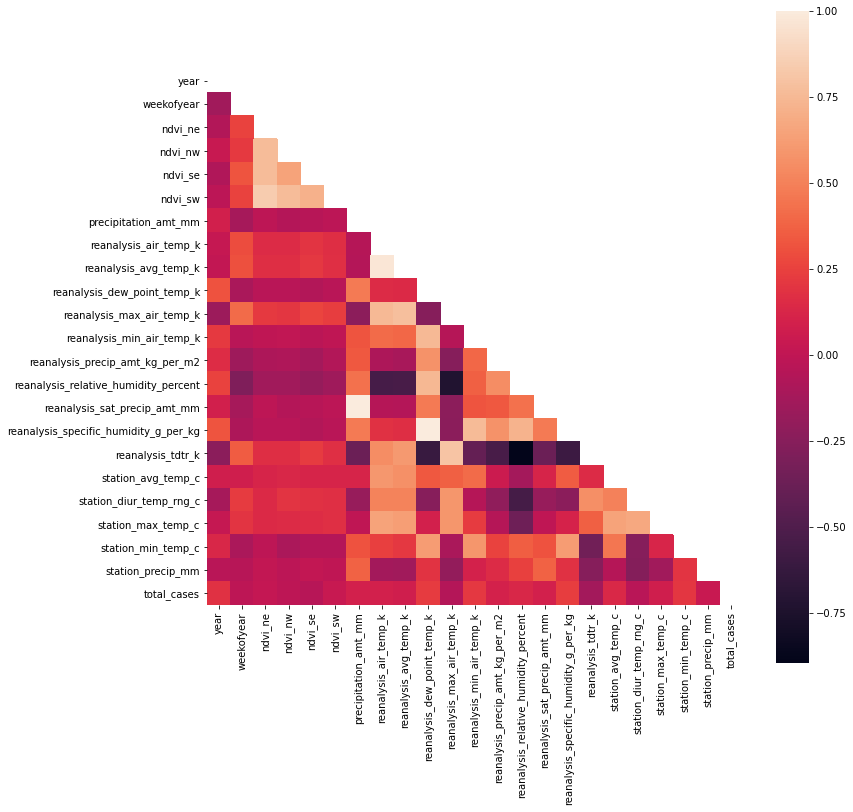

In [31]:
#heatmap of iq
df_iq = df[df['iq'] == 1]
df_iq = df_iq.drop(columns = ['iq', 'sj'])
df_iq = df_iq.merge(y_df_iq, on=['year', 'weekofyear'], how='left').drop(columns = ['city'])
corr_iq = df_iq.corr()
mask = np.triu(np.ones_like(corr_iq))
plt.figure(figsize = (12,12))
sns.heatmap(corr_iq, square=True, mask=mask)

In [32]:
# linear regression of iq
Y_iq = df_iq['total_cases']
X_iq = df_iq.drop(columns = ['total_cases'])
X_iq = sm.add_constant(X_iq)

In [34]:
model_iq = sm.OLS(Y_iq, X_iq)
res_iq = model_iq.fit()
res_iq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2.653
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           0.000106
Time:                        23:47:57   Log-Likelihood:                -1945.5
No. Observations:                 520   AIC:                             3935.
Df Residuals:                     498   BIC:                             4029.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  1719.0234   1777.210      0.967      0.334   -1772.731    5210.778
year                                      0.4471      0.172      2.596      0.010       0.109       0.786
weekofyear                                0.0213      0.035      0.600      0.549      -0.048       0.091
ndvi_ne                                  14.1204     12.370      1.141      0.254     -10.184      38.425
ndvi_nw                                 -12.9220     10.196     -1.267      0.206     -32.954       7.110
ndvi_se                                 -18.0479      9.715     -1.858      0.064     -37.136       1.040
ndvi_sw                                  13.5923     10.742      1.265      0.206      -7.512      34.697
precipitation_amt_mm                     -0.0039      0.008     -0.489      0.625      -0.020       0.012
reanalysis_air_temp_k                    -1.1185      5.009     -0.223      0.823     -10.960       8.723
reanalysis_avg_temp_k                    -0.1191      2.132     -0.056      0.955      -4.308       4.069
reanalysis_dew_point_temp_k              -7.7725      6.730     -1.155      0.249     -20.994       5.450
reanalysis_max_air_temp_k                -0.4395      0.460     -0.956      0.339      -1.343       0.464
reanalysis_min_air_temp_k                 0.1152      0.656      0.176      0.861      -1.174       1.404
reanalysis_precip_amt_kg_per_m2          -0.0092      0.013     -0.728      0.467      -0.034       0.016
reanalysis_relative_humidity_percent     -0.4519      1.074     -0.421      0.674      -2.561       1.657
reanalysis_sat_precip_amt_mm             -0.0039      0.008     -0.489      0.625      -0.020       0.012
reanalysis_specific_humidity_g_per_kg    10.2735      5.855      1.755      0.080      -1.229      21.776
reanalysis_tdtr_k                        -0.2290      0.745     -0.307      0.759      -1.693       1.235
station_avg_temp_c                       -0.2284      0.899     -0.254      0.800      -1.994       1.537
station_diur_temp_rng_c                   0.2057      0.546      0.377      0.707      -0.867       1.279
station_max_temp_c                        0.3274      0.587      0.558      0.577      -0.826       1.481
station_min_temp_c                        0.8797      0.597      1.473      0.141      -0.294       2.053
station_precip_mm                         0.0049      0.008      0.597      0.551      -0.011       0.021
==============================================================================
Omnibus:                      488.811   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19190.278
Skew:                           4.048   Prob(JB):                         0.00
Kurtosis:  

In [35]:
# linear regression of 
Y_sj = df_sj['total_cases']
X_sj = df_sj.drop(columns = ['total_cases'])
X_sj = sm.add_constant(X_sj)

In [36]:
model_sj = sm.OLS(Y_sj, X_sj)
res_sj = model_sj.fit()
res_sj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     9.156
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           1.56e-26
Time:                        23:50:16   Log-Likelihood:                -4925.4
No. Observations:                 936   AIC:                             9895.
Df Residuals:                     914   BIC:                         1.000e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  1.032e+04   6728.269      1.534      0.125   -2885.463    2.35e+04
year                                     -2.6026      0.487     -5.344      0.000      -3.558      -1.647
weekofyear                                0.6685      0.143      4.661      0.000       0.387       0.950
ndvi_ne                                  46.5869     20.172      2.309      0.021       6.997      86.177
ndvi_nw                                 -61.1511     23.696     -2.581      0.010    -107.655     -14.647
ndvi_se                                -223.1351     49.310     -4.525      0.000    -319.909    -126.361
ndvi_sw                                 226.6332     50.039      4.529      0.000     128.429     324.837
precipitation_amt_mm                     -0.0312      0.024     -1.308      0.191      -0.078       0.016
reanalysis_air_temp_k                   -70.3370     85.901     -0.819      0.413    -238.922      98.248
reanalysis_avg_temp_k                   -45.7217     20.994     -2.178      0.030     -86.924      -4.520
reanalysis_dew_point_temp_k              87.2469     80.049      1.090      0.276     -69.853     244.347
reanalysis_max_air_temp_k                14.5608      5.053      2.881      0.004       4.643      24.478
reanalysis_min_air_temp_k                 3.8742      5.182      0.748      0.455      -6.296      14.044
reanalysis_precip_amt_kg_per_m2           0.0403      0.063      0.635      0.526      -0.084       0.165
reanalysis_relative_humidity_percent    -24.2086     17.715     -1.367      0.172     -58.975      10.558
reanalysis_sat_precip_amt_mm             -0.0312      0.024     -1.308      0.191      -0.078       0.016
reanalysis_specific_humidity_g_per_kg    26.6954     22.102      1.208      0.227     -16.680      70.071
reanalysis_tdtr_k                        -3.3075      5.764     -0.574      0.566     -14.620       8.005
station_avg_temp_c                      -10.5330      5.442     -1.936      0.053     -21.213       0.147
station_diur_temp_rng_c                  -1.8422      3.409     -0.540      0.589      -8.532       4.848
station_max_temp_c                        3.2602      2.707      1.204      0.229      -2.052       8.572
station_min_temp_c                        0.1540      3.271      0.047      0.962      -6.265       6.573
station_precip_mm                         0.0186      0.072      0.258      0.796      -0.123       0.160
==============================================================================
Omnibus:                      802.326   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19717.764
Skew:                           3.909   Prob(JB):                         0.00
Kurtosis:  

# Observation:
ndvi_ne, ndvi_nw, ndvi_se, ndvi_sw highly correlated
reanalysis_air_temp_k, reanalysis_avg_temp_k highly correlated

reanalysis_sat_precip_amt_mm, precipitation_amt_mm highly correlated


# Questions:
要不要加上labels 的csv 再画correlation matrix？

上面heatmap 因为iq都是1，所以那个grid是白色的，不知道该怎么改？

week_of_date 感觉更像一种“信息”，我不知道怎么处理更合适